In [1]:
from sklearn.datasets import load_digits

numbers = load_digits()

print(numbers.data.shape)
print(numbers.target.shape)

(1797, 64)
(1797,)


In [2]:
print(numbers.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [3]:
print(type(numbers.data))

<class 'numpy.ndarray'>


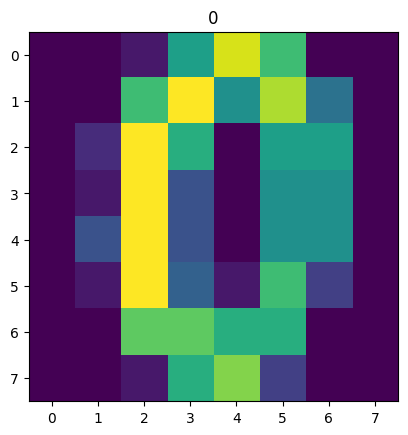

In [4]:
indx = 10
number = numbers.data[indx].reshape(8,8)
import matplotlib.pyplot as plt

plt.title(numbers.target[indx]) 
plt.imshow(number)
plt.show()

In [5]:
data = numbers.data

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42,)
clusters = kmeans.fit_predict(data)

In [7]:
from scipy.stats import mode
def map_cluster_labels(clusters, true_labels):
    labels = np.zeros_like(clusters)
    for i in range(10):
        mask = (clusters == i)
        labels[mask] = mode(true_labels[mask])[0] 
    return labels

LINE 2:
true_labels: The actual labels for the data points, which are used to map the clusters to the closest corresponding class.

LINE 6:
true_labels[mask]: Extracts the true labels of the data points in cluster i.
mode(true_labels[mask]): Finds the most common label (majority class) in the cluster.
[0]: Retrieves the value of the most common label.
Assigns the majority class label to all data points in cluster i in the labels array.

This function maps KMeans clusters to the true classes in the dataset. In short:

It examines each cluster.
For each cluster, it finds the most common true label (majority class).
It assigns that majority class label to all the data points in the cluster.
Purpose:
This is done to make the clusters interpretable and evaluate the performance of KMeans, since KMeans cluster labels don’t have inherent meaning.
--------------------------------------------------


In [8]:
import scipy
print(scipy.__version__)

1.14.1
